## Arizona Policy Lab Data

## Key Findings:

***Immigration attitudes: Sizable pluralities view immigrants as beneficial to U.S. and Arizona culture. There is also broad support for a path to citizenship. Arizonans are more divided on Trump's border wall, as well as the racial justice protests***

***Covid attitudes: A majority of Arizonans prefer a mask mandate, while also reporting compliance in excess of 75% of regularly wearing a mask. Only a small portion of Arizonans report never or rarely wearing a mask (approximately 10%). Arizonans are divided on Trump's Covid response, and are slightly more disapproving of Governor Ducey's response. Interestingly, Arizonans are overwhelmingly supportive of mayoral responses to the crisis.***

***Partisan differences: The parties are ideologically divided, though Republican identifiers are more likely to choose the ideologically extreme "conservative" categories (relative to Democrats choosing the most extreme "liberal" category). Contrary to the notion that the modern Democratic Party consists of "radical leftists," in this state, we find the opposite. Democrats are quite moderate in their ideological position, most likely to choose the "moderate" category. Approximately 2/3 of Republicans, on the other hand, choose the most extreme "conservative" label. Republican's ideological orientation is notably more extreme than their Democratic counterparts in the state***

***There are important partisan differences on policy as well. While Democrats hold a uniformly positie orientation towards immigrants, Republicans are much more mixed. Half the coalition takes on relatively "liberal" positions, endorsing a pathway to citizenship and believing that immigrants help the country and state. The remaining half hold a more conservative view. Thus, while many Republicans identify as "conservative" how this translates to policy is less clear. Immigration is more divisive within the state's Republican coalition, than within the Democratic coalition.****

***Clear partisan differences emerge on several divisive issues: Trump's border wall, racial justice protests, and reactions to the Covid pandemic. Republicans are more unified in their support for the border wall, with Democrats assuming the opposing position. Republicans are generally unified in their disapproval of the racial justice protests, Democrats are overwhelmingly approving. Nearly all Democrats report often wearing a mask, this number hovers around 80% among Democrats. Democrats are almost perfectly unified in their support of a mask mandate. Republicans are evenly split, with 50% approving and 50% disapproving of such a mandate. This analyses underscores an important dynamic, and one commonly found in the literature: Republicans, not Democrats, while more ideologically extreme, are also more ideologically divided. Trump may control the modern Republican Party, but there is a fair amout of Republican disagreement, such that a non-trivial number of Republicans (about 50%) select options that are endorsed by their Democratic counterparts. This would suggest that while the state may be divided, it's not as polarized as one might expect. Sizable portions of Democrats and Republicans agree on policies intended to minimize the effects of Covid. We find something similar with respect to education. 75% of Democrats support a continuation of online instruction, whereas only about 40% of Democrats support online instruction. Republicans are more supportive of in-person instruction vis a vis K12 and university eduction. Much clearer partisan differences emerge when evaluating political leaders. Democrats are far more negative of Trump and Ducey's covid response.***

***The partisan divisions within the state of Arizona, while real, are not as large as one might anticipate. Another way to approach this question is with respect to respondent's ideological assessment of the political parties. For instance, are Democrats in the state of Arizona much more liberal, slightly more liberal, moderate, slightly more conservative, or much more conservative than Democrats nationally? The same question was asked about state Republicans. About 50% of Democrats and Republicans agree that state Democrats/Republicans are generally in ideologial lock-step with the national party. What's interesting is the remaining 50%. Both Democrats/Republicans generally agree that Arizonans who identify as ***Democrat are more conservative than the Democrats, nationally**, likewise, ***Republicans are generally seen as more liberal than the national party***. Arizona respondents are divided in important ways, though both parties recognize that Democrats and Republicans in their state tend towards a centrist view. This applies to policy, as well as perceptions of the parties.***





Dynata/SSI collected these data. 

$\bullet$ N=1,144 participants were contacted. Most respondents were contacted by email, a smaller sample was contacted by phone. The phone interviews did not come with gender and age. 

$\bullet$ Missing data were imputed through a process known as multiple imputation through chained equations (MICE). It's commonly used in Stata, so this is what I opted to use. 

$\bullet$ I weight back to state population proportions, with respect to age, sex, ethnicity, and race. 


Below you'll see the data -- just scroll down if you're not interested. For presentation purposes, I recoded much of the data as three categories.




In [22]:
library(dplyr)
library(survey)  
library(mice)  
data<-read.csv("~/Desktop/APL Survey/APLData.csv")

dat<-data.frame(ID=seq(1:length(data[,1])))

### Create the labeled variable
clean_data<-suppressWarnings(dat %>% 
  mutate(time_az=recode(data$q1, `1`=1, `2`=2, `3`=3)) %>%
  mutate(interests=recode(data$q2, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(interest_r=recode(data$q2, `1`="Similar", `2`="Similar", `3`="Neither", `4`="Different", `5`="Different" )) %>%
  mutate(identity_AZ=recode(data$q3, `1`=7, `2`=6, `3`=5, `4`=4, `5`=3, `6`=2 , `7`=1 )) %>%
  mutate(identity_AZ_r=recode(data$q3, `1`="Strong", `2`="Strong", `3`="Strong", `4`="Neutral", `5`="Weak", `6`="Weak" , `7`="Weak" )) %>%
  mutate(identity_US=recode(data$q4, `1`=7, `2`=6, `3`=5, `4`=4, `5`=3, `6`=2 , `7`=1 )) %>%
  mutate(identity_US_r=recode(data$q4, `1`="Strong", `2`="Strong", `3`="Strong", `4`="Neutral", `5`="Weak", `6`="Weak" , `7`="Weak" )) %>%
  mutate(needs_met=recode(data$q5, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(needs_met_r=recode(data$q5, `1`="Better", `2`="Better", `3`="Same", `4`="Worse", `5`="Worse" )) %>%
  mutate(rep_ideo=recode(data$q6, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(rep_ideo_r=recode(data$q6, `1`="Conservative", `2`="Conservative", `3`="Same", `4`="Liberal", `5`="Liberal" )) %>%
  mutate(rep_ideo_label=recode(data$q6, `1`="Much more Conservative", `2`="Slightly More Conservative", `3`="Same", `4`="Slightly More Liberal", `5`="Much More Liberal" )) %>%
  mutate(dem_ideo=recode(data$q7, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(dem_ideo_r=recode(data$q7, `1`="Conservative", `2`="Conservative", `3`="Same", `4`="Liberal", `5`="Liberal" )) %>%
  mutate(dem_ideo_label=recode(data$q7, `1`="Much more Conservative", `2`="Slightly More Conservative", `3`="Same", `4`="Slightly More Liberal", `5`="Much More Liberal" )) %>%
  mutate(covid_affected=recode(data$q8, `1`=1, `2`=0, `2`=0)) %>%
  mutate(covid_affected_r=recode(data$q8, `1`="Yes", `2`="No", `2`="No")) %>%
  mutate(covid_finance=recode(data$q9, `1`=1, `2`=0, `2`=0)) %>%
  mutate(covid_finance_r=recode(data$q9, `1`="Yes", `2`="No", `2`="No")) %>%
  mutate(wear_mask=recode(data$q10, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(wear_mask_r=recode(data$q10, `1`="Often", `2`="Often", `3`="Half Time", `4`="Rarely", `5`="Rarely" )) %>%
  mutate(public_mask=recode(data$q11, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(public_mask_r=recode(data$q11, `1`="Yes", `2`="Yes", `3`="Not Sure", `4`="No", `5`="No" )) %>%
  mutate(k12=recode(data$q12, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(k12_r=recode(data$q12, `1`="Online", `2`="Online", `3`="Not Sure", `4`="In Person", `5`="In Person" )) %>%
  mutate(college=recode(data$q13, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(college_r=recode(data$q13, `1`="Online", `2`="Online", `3`="Not Sure", `4`="In Person", `5`="In Person")) %>% 
  # Approval
  mutate(trump_covid=recode(data$q14, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(ducey_covid=recode(data$q15, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(mayor_covid=recode(data$q16, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(trump_covid_r=recode(data$q14, `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(ducey_covid_r=recode(data$q15,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(mayor_covid_r=recode(data$q16,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  # Policies, Conservative driection
  mutate(border_wall=recode(data$q17, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(border_wall_r=recode(data$q17,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(imm_citizenship=recode(data$q18, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_citizenship_r=recode(data$q18,  `1`="Support", `2`="Support", `3`="Not Sure", `4`="Oppose", `5`="Oppose" )) %>%
  mutate(imm_hurt_az=recode(data$q19, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_hurt_az_r=recode(data$q19, `1`="Help", `2`="Help", `3`="Neutral", `4`="Hurt", `5`="Hurt" )) %>%
  mutate(imm_hurt_culture=recode(data$q20, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_hurt_culture_r=recode(data$q20,  `1`="Help", `2`="Help", `3`="Neutral", `4`="Hurt", `5`="Hurt" )) %>%
  mutate(oppose_race_protests=recode(data$q21, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(oppose_race_protests_r=recode(data$q21,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  # Policies, More contact and positive with police
  mutate(interact_law=recode(data$q22, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(positive_law=recode(data$q23, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(positive_law_r=recode(data$q23, `1`="Positive", `2`="Positive", `3`="Mix", `4`="Negative", `5`="Negative" )) %>%
  # Pol Participation  
  mutate(registered=recode(data$q24, `1`=1, `2`=0)) %>%
  mutate(plan_to_vote_pres=recode(data$q25, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(vote_preference_pres=recode(data$q26, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(biden_v_trump_r=recode(data$q26, `1`="Biden(D)", `2`="Biden(D)",`4`="Trump(R)", `5`="Trump(R)", `3`="Other/Not Sure", `6`="Someone Else" )) %>%
  mutate(plan_to_vote_senate=recode(data$q27, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(vote_preference_sen=recode(data$q28, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(mcsally_v_kelly=recode(data$q28, `1`="Kelly(D)", `2`="Kelly(D)",`4`="McSally(R)", `5`="McSally(R)", `3`="Other/Not Sure", `6`="Someone Else" )) %>%
  ## Partisanship
  mutate(pid=recode(data$q29, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 , `6`=6 , `7`=7 )) %>%
  mutate(pid3=recode(data$q29, `1`="Democrat", `2`="Democrat", `3`="Independent", `4`="Independent", `5`="Independent" , `6`="Republican" , `7`="Republican" )) %>%
  mutate(pid5=recode(data$q29, `1`="Democrat", `2`="Democrat", `3`="Independent (Lean D)", `4`="Independent", `5`="Independent (Lean R)" , `6`="Republican" , `7`="Republican" )) %>%
  ## Feeling therms
  mutate(dem_ft=data$q30) %>%
  mutate(rep_ft=data$q31) %>%
  mutate(dem_ft_people=data$q32) %>%
  mutate(rep_ft_people=data$q33) %>%
  mutate(ideo=recode(data$q34, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
  mutate(ideo_r=recode(data$q29, `1`="Liberal", `2`="Liberal", `3`="Moderate", `4`="Conservative", `5`="Conservative" )) %>%
  mutate(ideo_label=factor(recode(data$q29, `1`="Liberal", `2`="Slightly Liberal", `3`="Moderate", `4`="Slightly Conservative", `5`="Conservative" ))) %>%
    ##Dems
  mutate(hispanic=recode(data$q35, `1`=1, `2`=0)) %>%
  mutate(race=recode(data$q36, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
  mutate(christian=recode(data$q37, `1`=1, `2`=1, `3`=0, `4`=0, `5`=0)) %>%
  mutate(income=recode(data$q38, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
  mutate(children=recode(data$q39, `1`=1, `2`=0)) %>%
  mutate(age=recode(data$age, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
  mutate(sex=recode(data$gender, `1`=1, `2`=2)) )

tempData <- mice(clean_data,m=1,maxit=50,meth='pmm',seed=500, printFlag=FALSE)
clean_data<-complete(tempData,1)


Warning message:
“Number of logged events: 28”

## Survey Weights

I weighted the data using raking. I weighted the sample to the population based on age, sex, race, ethnicity. The entered numbers below are the marginal distributions for AZ, from the census


In [23]:
### Weight on Income
library(survey)
model<-suppressWarnings(svydesign(ids=~1, data=clean_data))
hispanic_dist<-data.frame(hispanic=c(0, 1),
                             Freq=nrow(clean_data)*c(0.69,0.31))
race_dist<-data.frame(race=c(1,2,3,4,5),
                          Freq=nrow(clean_data)*c(0.77, 0.04, 0.03, 0.04, 0.12))
age_dist<-data.frame(age=c(1,2,3,4),
                      Freq=nrow(clean_data)*c(0.32, 0.30, 0.15, 0.23))
sex_dist<-data.frame(sex=c(1,2),
                     Freq=nrow(clean_data)*c(0.50, 0.5))
income_dist<-data.frame(income=c(1,2,3,4),
                     Freq=nrow(clean_data)*c(0.45, 0.31, 0.14, 0.10))


raked_data<-rake(design=model,
                 sample.margins=list(~hispanic, ~race, ~sex, ~age, ~income),
                 population.margins=list(hispanic_dist, race_dist, sex_dist, age_dist, income_dist))




##  Cultural Issues 

We start by considering responses to immigration and racial justice issues. The following items were analyzed. 

$\bullet$ **Do you approve or disapprove of the construction of a Border Wall along the US-Mexico border?**

$\bullet$ **To what extent do you support or oppose a pathway to citizenship for immigrants who entered the United States illegally as children, a group commonly known as the Dreamers?**

$\bullet$ **Generally speaking, do you think that immigrants who move to Arizona help the economy of the state, hurt the economy of the state, or make no difference?**

$\bullet$**Generally speaking, do you think that immigrants who move to Arizona help the culture of the state, hurt the culture of the state, or make no difference?**


$\bullet$ **Following the murder of George Floyd in Minneapolis, protests occurred throughout the United States, including areas of Arizona. Do you approve or disapprove of these protest activities?**





In [24]:
library(survey)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

uni_dist<-function(var, design, title,
                   xlabel="Test", upper=0.5){
  f<-as.formula(paste0("~", var))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>%
    mutate(Proportion=Freq/sum(Freq)) %>%
    arrange(desc(Proportion)) 
    return(tab_w)
}
uni_plot<-function(tab_w, title, upper){
  plot<-ggplot(data=tab_w, mapping=aes(x=tab_w[,1], y=Proportion)) +
    geom_col()+
    coord_flip()+
    theme_bw() +
    theme(axis.ticks=element_blank())+
    ggtitle(title)+
    scale_y_continuous("Proportion", limits=c(0,upper))+
    scale_x_discrete("")+
    labs(caption="Arizona Policy Lab Election and Policy Survey")
  return(plot)
}


***Once again, the code can be ignored.** 

**Arizonans are polarized on the issue of building a southern border while**, while on the whole holding favorable attitudes towards immigrants. Large numbers believe immigrants help the culture in Arizona, and favor a path for citizenship for Dreamers.**

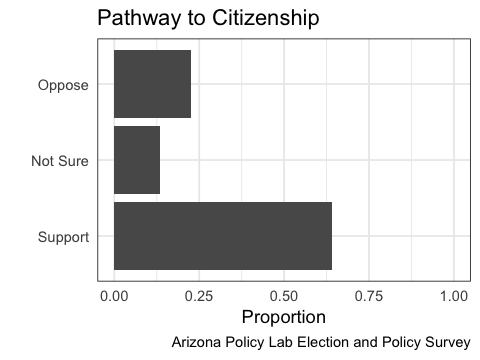

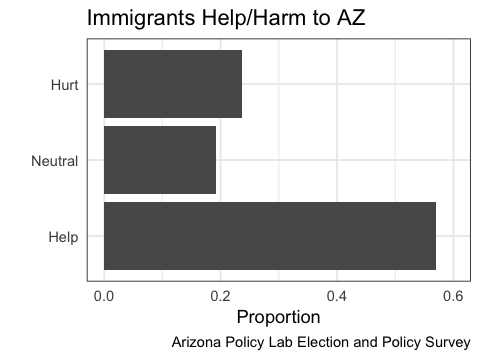

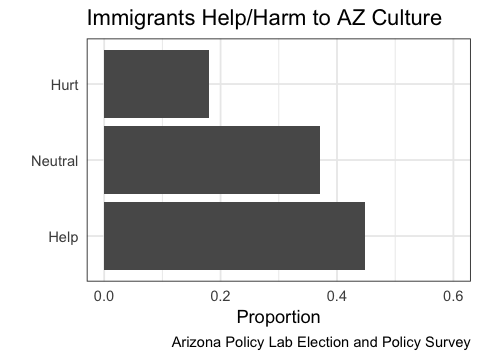

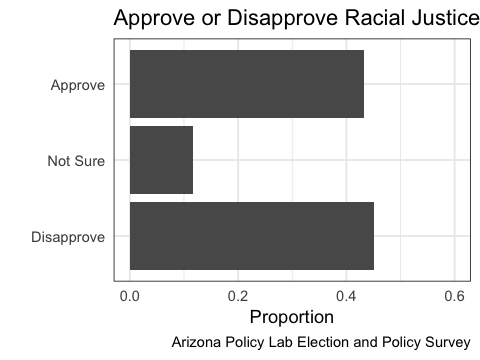

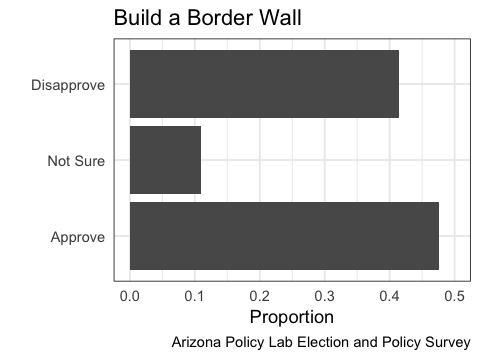

In [25]:
library(dplyr)
options(repr.plot.width=4, repr.plot.height=3)
tab_w<-uni_dist("imm_citizenship_r", raked_data, title="Pathway to Citizenship", xlabel="Citizenship", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Support", "Not Sure", "Oppose"))
uni_plot(tab_w, title="Pathway to Citizenship", upper=1)

tab_w<-uni_dist("imm_hurt_az_r", raked_data, title="Do Immigrants Help or Hurt AZ?", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Help", "Neutral", "Hurt"))
uni_plot(tab_w, title="Immigrants Help/Harm to AZ", upper=0.6)

tab_w<-uni_dist("imm_hurt_culture_r", raked_data, title="Do Immigrants Help or Hurt Culture?", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Help", "Neutral", "Hurt"))
uni_plot(tab_w, title="Immigrants Help/Harm to AZ Culture", upper=0.6)

tab_w<-uni_dist("oppose_race_protests_r", raked_data, title="Approve or Disapprove Racial Justice Protests", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Disapprove", "Not Sure", "Approve"))

uni_plot(tab_w, title="Approve or Disapprove Racial Justice Protests", upper=0.6)
tab_w<-uni_dist("border_wall_r", raked_data, title="Beliefs about Building a Southern Border Wall", xlabel="Border Wall", upper=1)

tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Build a Border Wall", upper=0.5)


In [15]:
tab_w<-uni_dist("biden_v_trump_r", raked_data, title="Vote for Biden or Trump", xlabel="Vote", upper=1)
tab_w

tab_w<-uni_dist("mcsally_v_kelly", raked_data, title="Vote for Biden or Trump", xlabel="Vote", upper=1)
tab_w


biden_v_trump_r,Freq,Proportion
Biden(D),463.29792,0.40498070
Trump(R),423.36350,0.37007299
Other/Not Sure,241.86943,0.21142432
Someone Else,15.46915,0.01352199


mcsally_v_kelly,Freq,Proportion
Kelly(D),459.1575,0.40136144
McSally(R),373.5493,0.32652913
Other/Not Sure,282.1781,0.24665916
Someone Else,29.1151,0.02545026


##  Covid and Public Health

We start by considering responses to immigration and racial justice issues. The following items were analyzed. 

$\bullet$  **Next, we’d like to ask for your views on the COVID-19 Pandemic.  Have you or someone in your immediate family tested positive for COVID-19?**


$\bullet$ **Have you or someone in your immediate family become unemployed as a result of the COVID-19 pandemic?**

$\bullet$ **When you go out in public, how often do you wear a face mask?**

 $\bullet$ **Do you believe that face-masks should be required by law when Arizonans are out in public?**


$\bullet$ **Do you feel that K-12 schools in Arizona should have in-person classes in the fall or should classes take place online?**


$\bullet$ **Do you feel that universities in Arizona should have in-person classes in the fall or should classes take place online?**


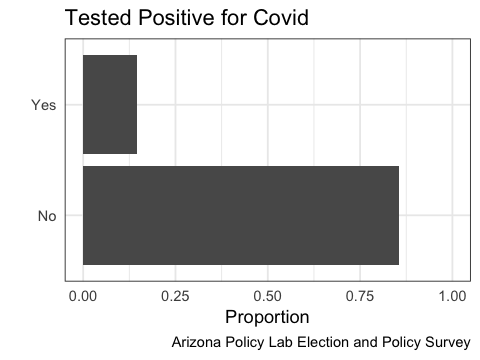

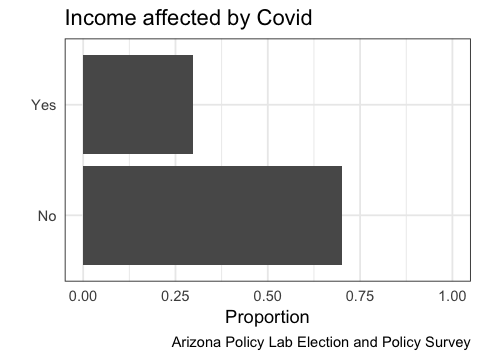

  wear_mask_r      Freq Proportion
1       Often 983.49943 0.85970230
2   Half Time  94.18706 0.08233135
3      Rarely  66.31351 0.05796636


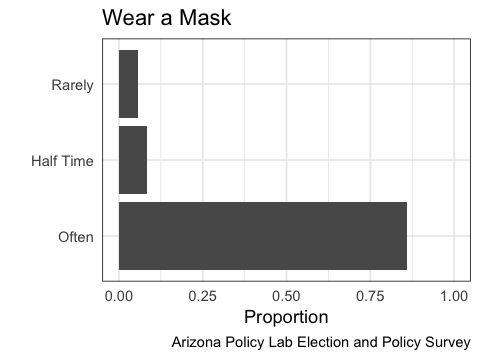

  public_mask_r      Freq Proportion
1           Yes 784.98368 0.68617454
2            No 287.80062 0.25157397
3      Not Sure  71.21571 0.06225149


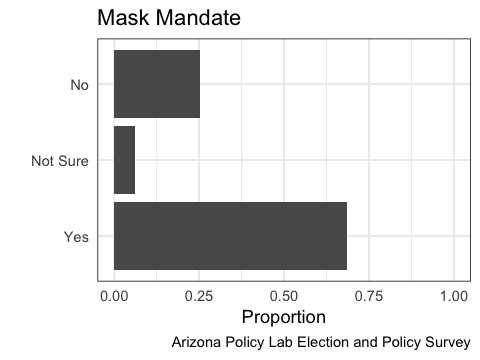

In [26]:
options(repr.plot.width=4, repr.plot.height=3)
tab_w<-uni_dist("covid_affected_r", raked_data, title="Family/Self Positive for Covid", 
                xlabel="Citizenship", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("No", "Yes"))
uni_plot(tab_w, title="Tested Positive for Covid", upper=1)

tab_w<-uni_dist("covid_finance_r", raked_data, title="Income affected by Covid",
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("No", "Yes"))
uni_plot(tab_w, title="Income affected by Covid", upper=1)

tab_w<-uni_dist("wear_mask_r", raked_data, title="Wear a Mask",
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Often", "Half Time", "Rarely" ))
uni_plot(tab_w, title="Wear a Mask", upper=1)

print(tab_w)
tab_w<-uni_dist("public_mask_r", raked_data, title="Mask Mandate",
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Yes", "Not Sure", "No" ))
uni_plot(tab_w, title="Mask Mandate", upper=1)

print(tab_w)



**A large portion proportion of Arizona respondents (87%) regularly wear facemasks and 69% prefer a mask mandate. Only 6% of respondents report rarely or never wearing a mask.  The remaining 7% report wearing a mask about half the time.** 

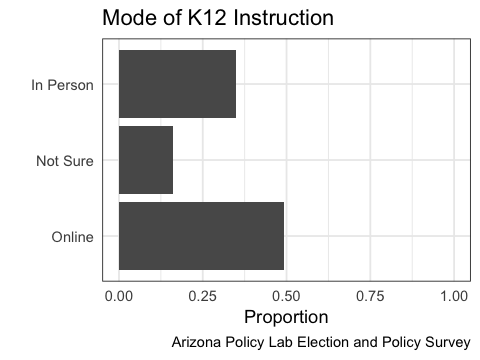

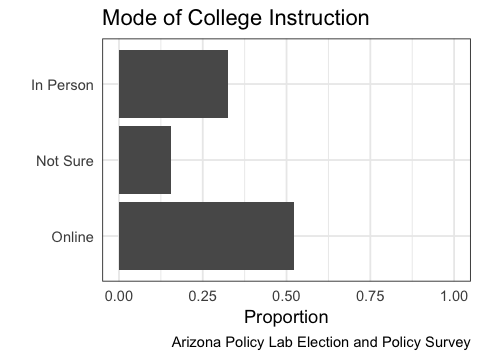

In [27]:
options(repr.plot.width=4, repr.plot.height=3)
tab_w<-uni_dist("k12_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Online", "Not Sure", "In Person"))
uni_plot(tab_w, title="Mode of K12 Instruction", upper=1)

tab_w<-uni_dist("college_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Online", "Not Sure", "In Person"))
uni_plot(tab_w, title="Mode of College Instruction", upper=1)



## Covid and Elected Officials



$\bullet$ **Do you approve or disapprove of how President Donald Trump has handled the COVID-19 pandemic?**

$\bullet$ **Do you approve or disapprove of how Governor Doug Ducey has handled the COVID-19 pandemic?**


$\bullet$ **Do you approve or disapprove of how the mayor in the city or town where you live has handled the COVID-19 pandemic?**


[1] "Marginal Distribution:"


trump_covid_r,Freq,Proportion
Disapprove,521.3828,0.4557542
Approve,491.9555,0.4300310
Not Sure,130.6616,0.1142147


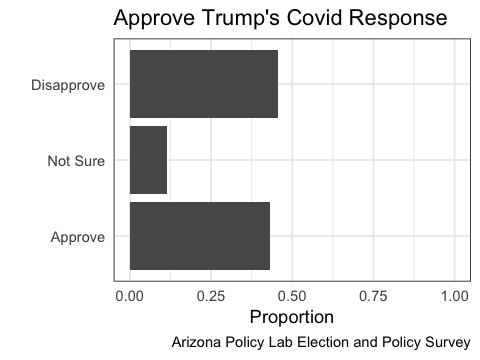

[1] "Marginal Distribution:"


ducey_covid_r,Freq,Proportion
Disapprove,522.7247,0.4569272
Approve,452.4490,0.3954974
Not Sure,168.8263,0.1475754


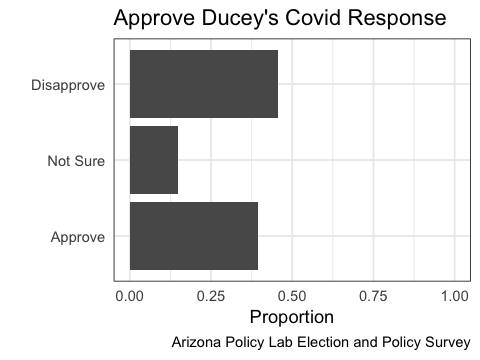

[1] "Marginal Distribution:"


mayor_covid_r,Freq,Proportion
Approve,621.1842,0.5429932
Not Sure,296.3411,0.2590394
Disapprove,226.4748,0.1979675


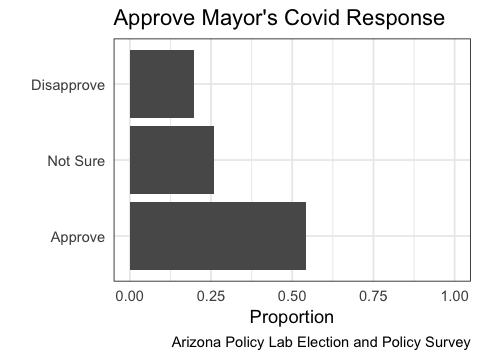

In [28]:
tab_w<-uni_dist("trump_covid_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Approve Trump's Covid Response", upper=1)
print("Marginal Distribution:")
tab_w

tab_w<-uni_dist("ducey_covid_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Approve Ducey's Covid Response", upper=1)
print("Marginal Distribution:")
tab_w


tab_w<-uni_dist("mayor_covid_r", raked_data, title="", 
                xlabel="", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Approve Mayor's Covid Response", upper=1)
print("Marginal Distribution:")
tab_w






**Arizonans are generally disapproving of Trump and Ducey's covid response; however, there is a greater gap for Ducey, suggesting that Arizonans blame the governor, and less so the president. What is also noteworthy is that a majority of Arizonans are happy with their mayor's covid response**

## Partisan Differences

Below I present reactions to these items by party. Again, feel free to just ignore the code and scroll down to the figures.

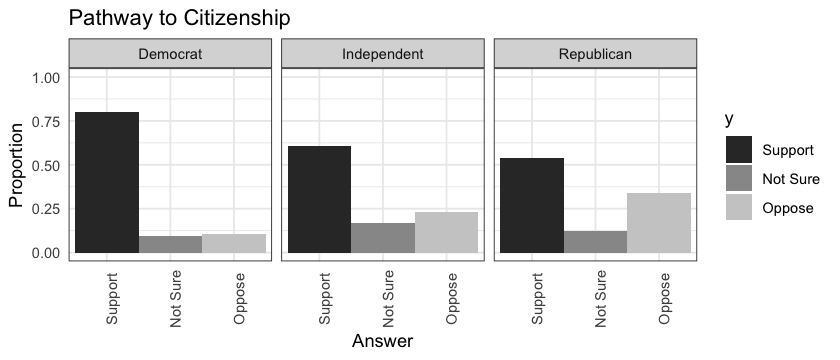

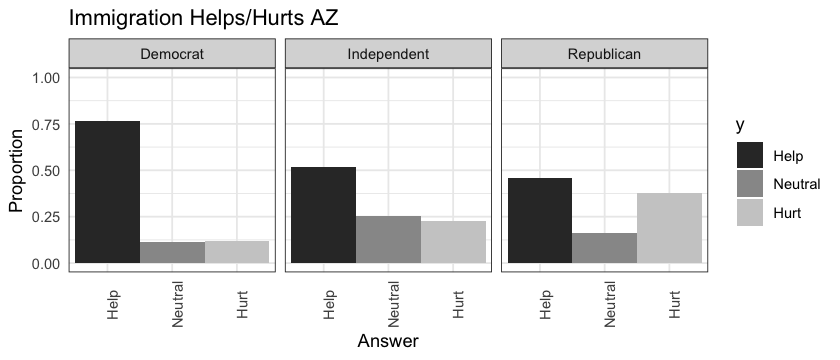

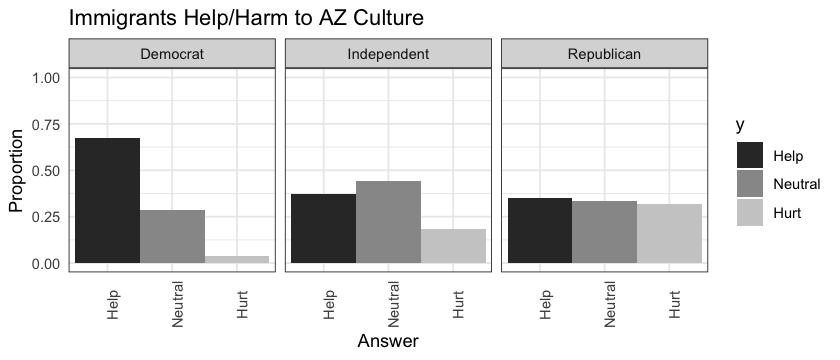

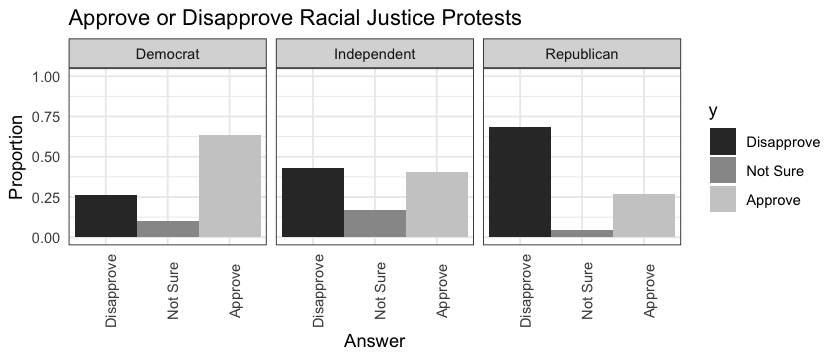

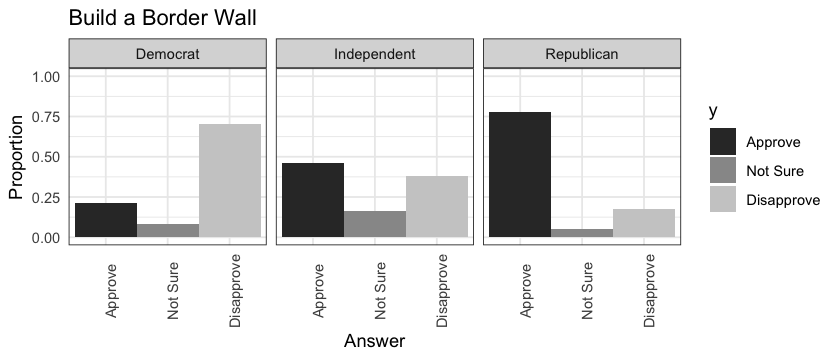

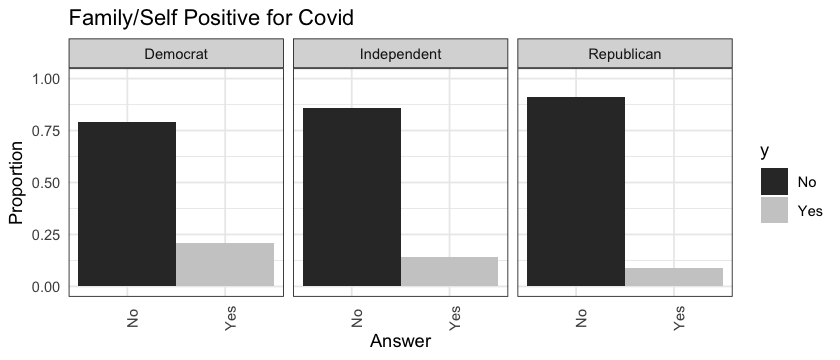

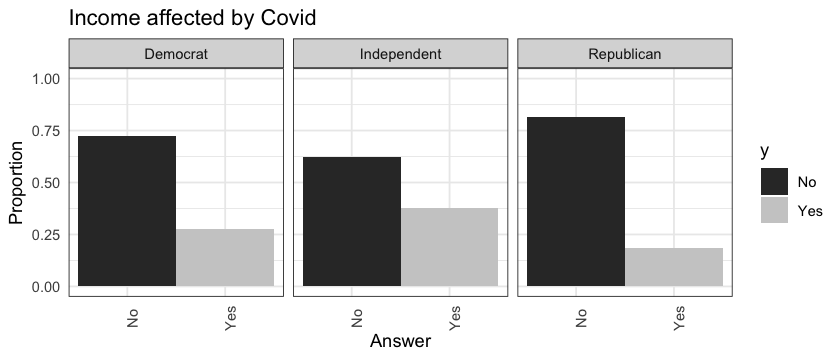

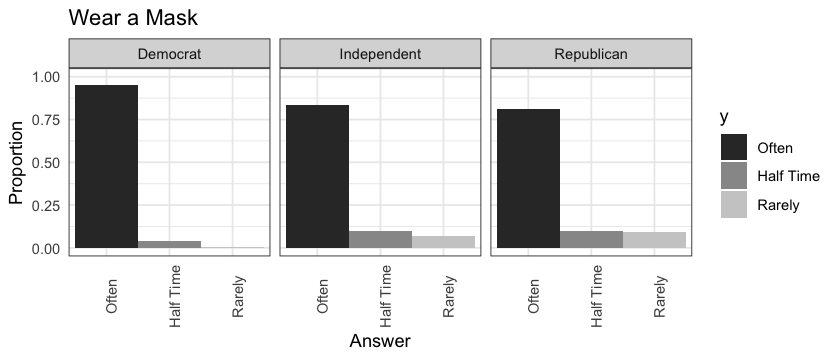

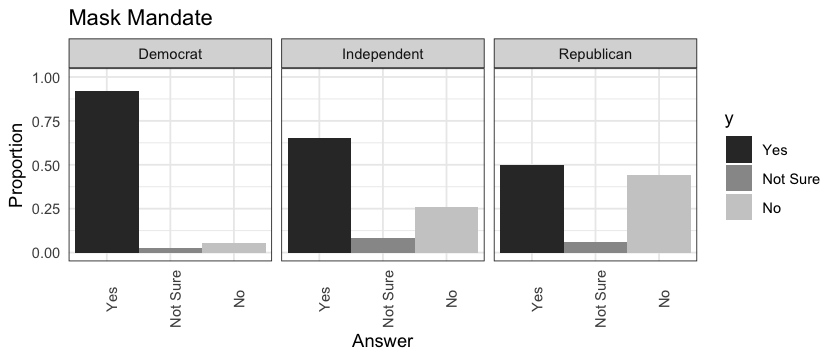

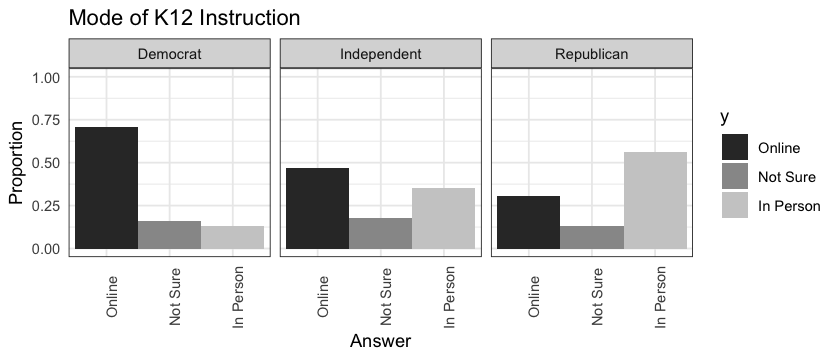

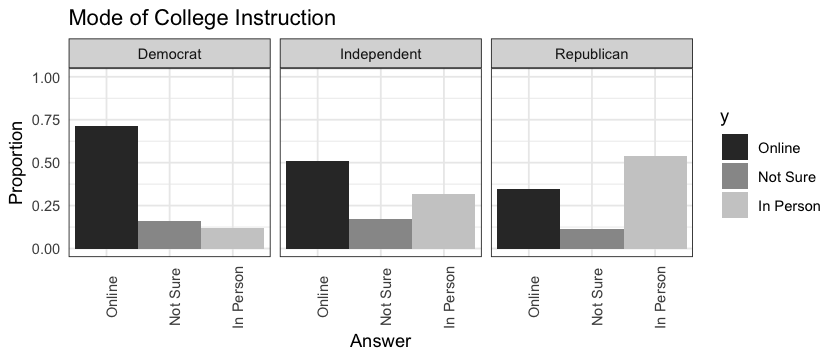

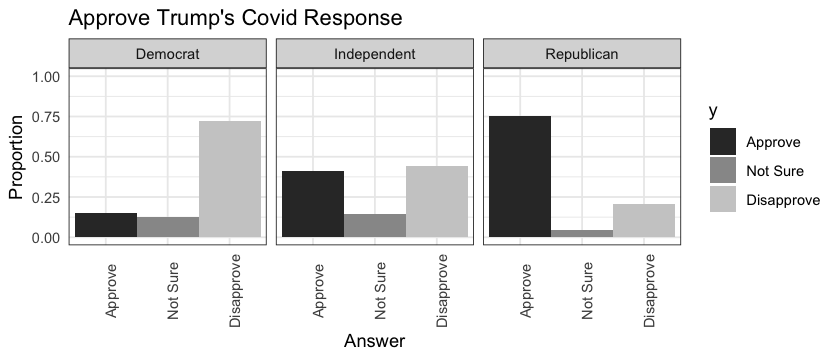

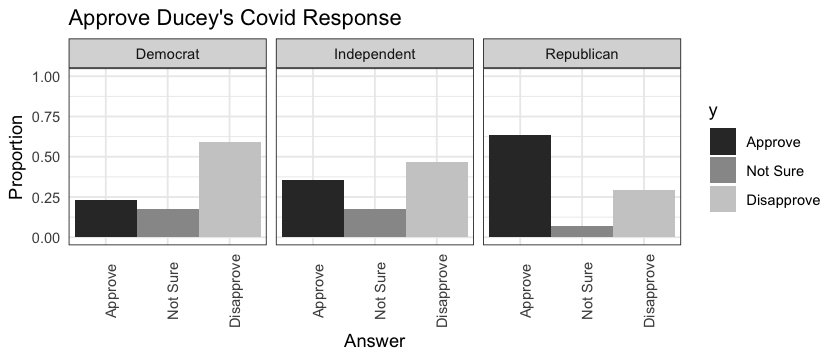

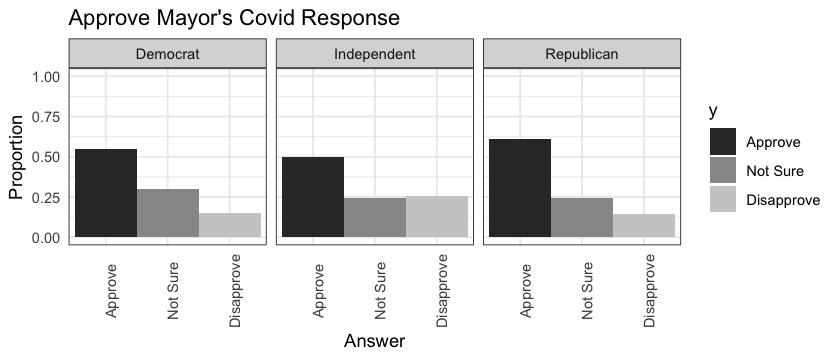

In [29]:
options(repr.plot.width=7, repr.plot.height=3)


  ## Take this function apart
bi_plot<-function(var1, var2, design, title="This",
                   xlabel="That", ylabel="And"){
  f<-as.formula(paste0("~", var1,"+", var2))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>% group_by(pid3) %>%
    mutate(total=sum(Freq)) %>%
    ungroup() %>%
   mutate(Proportion=Freq/total) 
  
  names(tab_w)<-c("y", "group", "frequency", "total", "Proportion")
  return(tab_w)
}

### Enter all the variables here

plot.fun<-function(title, upper) { 
    plot <- ggplot(tab_w, aes(x = y, y = Proportion, fill = y)) + 
        facet_wrap(~group) + geom_bar(width = 1, stat = "identity") + 
        scale_fill_grey() + theme_bw() + theme(axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
        ggtitle(title) + scale_y_continuous("Proportion", limits = c(0, upper)) + scale_x_discrete("Answer")
    return(plot)
}

tab_w<-bi_plot("imm_citizenship_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Support", "Not Sure", "Oppose"))
plot.fun("Pathway to Citizenship", 1)

tab_w<-bi_plot("imm_hurt_az_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigration Helps/Hurts AZ", 1)

tab_w<-bi_plot("imm_hurt_culture_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigrants Help/Harm to AZ Culture", 1)

tab_w<-bi_plot("oppose_race_protests_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Disapprove", "Not Sure", "Approve"))
plot.fun("Approve or Disapprove Racial Justice Protests", 1)

tab_w<-bi_plot("border_wall_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Approve", "Not Sure", "Disapprove"))
plot.fun("Build a Border Wall", 1)

tab_w<-bi_plot("covid_affected_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Yes"))
plot.fun("Family/Self Positive for Covid", 1)

tab_w<-bi_plot("covid_finance_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Yes"))
plot.fun("Income affected by Covid", 1)

tab_w<-bi_plot("wear_mask_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Often", "Half Time", "Rarely" ))
plot.fun("Wear a Mask", 1)

tab_w<-bi_plot("public_mask_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,  c("Yes", "Not Sure", "No" ))
plot.fun("Mask Mandate", 1)

tab_w<-bi_plot("k12_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Online", "Not Sure", "In Person"))
plot.fun("Mode of K12 Instruction", 1)

tab_w<-bi_plot("college_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Online", "Not Sure", "In Person"))
plot.fun("Mode of College Instruction", 1)

tab_w<-bi_plot("trump_covid_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Approve", "Not Sure", "Disapprove"))
plot.fun("Approve Trump's Covid Response", 1)


tab_w<-bi_plot("ducey_covid_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Approve", "Not Sure", "Disapprove"))
plot.fun("Approve Ducey's Covid Response", 1)


tab_w<-bi_plot("mayor_covid_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y,c("Approve", "Not Sure", "Disapprove"))
plot.fun("Approve Mayor's Covid Response", 1)





## How Ideological are AZ Respondents?

The Senate election in Arizona is unique in several ways. First, the strategy employed by the candidates are contrary to what is historically effective in American politics. In the political science literature, it is known that attack-oriented campaigns are most effective when waged against incumbents (Lau and Pomper 2001). The AZ Senate race is the opposite. Martha McSally, the incumbent Republican, has waged a fierce attack on Mark Kelly, a newcomer to politics. McSally’s narrative is that Mark Kelly is a product of the radical left, not a centrist Democrat. On Facebook: The Democrat Party of today is not your father's Democrat Party. They are radical, willing to do anything for power. Mark Kelly is hiding in his bunker because he doesn't want you to know that he's on their side, not yours.” And, “Arizona cannot afford Mark Kelly's radical left agenda. He will be in lockstep with Chuck Schumer, implementing a government takeover of our health care that would raise taxes on Arizona seniors….” The tone of Kelly’s campaign has been less combative, rarely engaging McSally directly, and when he does, it’s about the veracity of her public statements.

McSally’s narrative is similar to that put forth by the Trump campaign. Trump’s “law and order” theme has equated the Democratic Party with the “radical left.” This leads us to wonder how ideologically extreme the parties are within the state of Arizona. 

We start by considering responses to two items, ideology and party identification. Participants were asked, “When it comes to your political views, would you say you are liberal, conservative, or moderate?” They were also asked about their party identification, on a seven-point scale (“Strong Republican”, “Republican”, “Independent (Lean R”, “Independent”, “Independent (Lean D)”, “Democrat”). For statistical reasons, we recoded this variable to a five-point variable, corresponding to “Republican”, “Independent (Lean R)”, “Independent”, “Independent (Lean D)”, “Democrat”.


In [31]:
#### Univariate Plots ####
uni_dist<-function(var, design, title,
                   xlabel="Test", upper=0.5){
  f<-as.formula(paste0("~", var))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>%
    mutate(Proportion=Freq/sum(Freq)) %>%
    arrange(desc(Proportion)) 
    return(tab_w)
}
uni_plot<-function(tab_w, title, upper){
  plot<-ggplot(data=tab_w, mapping=aes(x=tab_w[,1], y=Proportion)) +
    geom_col()+
    coord_flip()+
    theme_bw() +
    theme(axis.ticks=element_blank())+
    ggtitle(title)+
    scale_y_continuous("Proportion", limits=c(0,upper))+
    scale_x_discrete("Belief")+
    labs(caption="Arizona Policy Lab Election and Policy Survey")
  return(plot)
}

  ## Take this function apart
bi_plot<-function(var1, var2, design, title="This",
                   xlabel="That", ylabel="And", upper=0.5){
  f<-as.formula(paste0("~", var1,"+", var2))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>% group_by(pid5) %>%
    mutate(total=sum(Freq)) %>%
    ungroup() %>%
   mutate(Proportion=Freq/total) 
  
  names(tab_w)<-c("y", "group", "frequency", "total", "Proportion")
  return(tab_w)
}

plot.fun<-function(title, upper, xlabels=c("Liberal", "Lean Liberal", "Moderate", "Lean Conservative", "Conservative")) { 
  plot <- ggplot(tab_w, aes(x = as.factor(y), y = Proportion, fill=as.factor(y))) + 
    facet_wrap(~group, ncol=2) + 
    geom_bar(width = 1, stat = "identity") + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle(title) +
    labs(caption="Arizona Policy Lab Election and Policy Survey")+
    scale_y_continuous("Proportion", limits = c(0, upper)) + 
    scale_x_discrete("Response", labels=xlabels)
  return(plot)
}





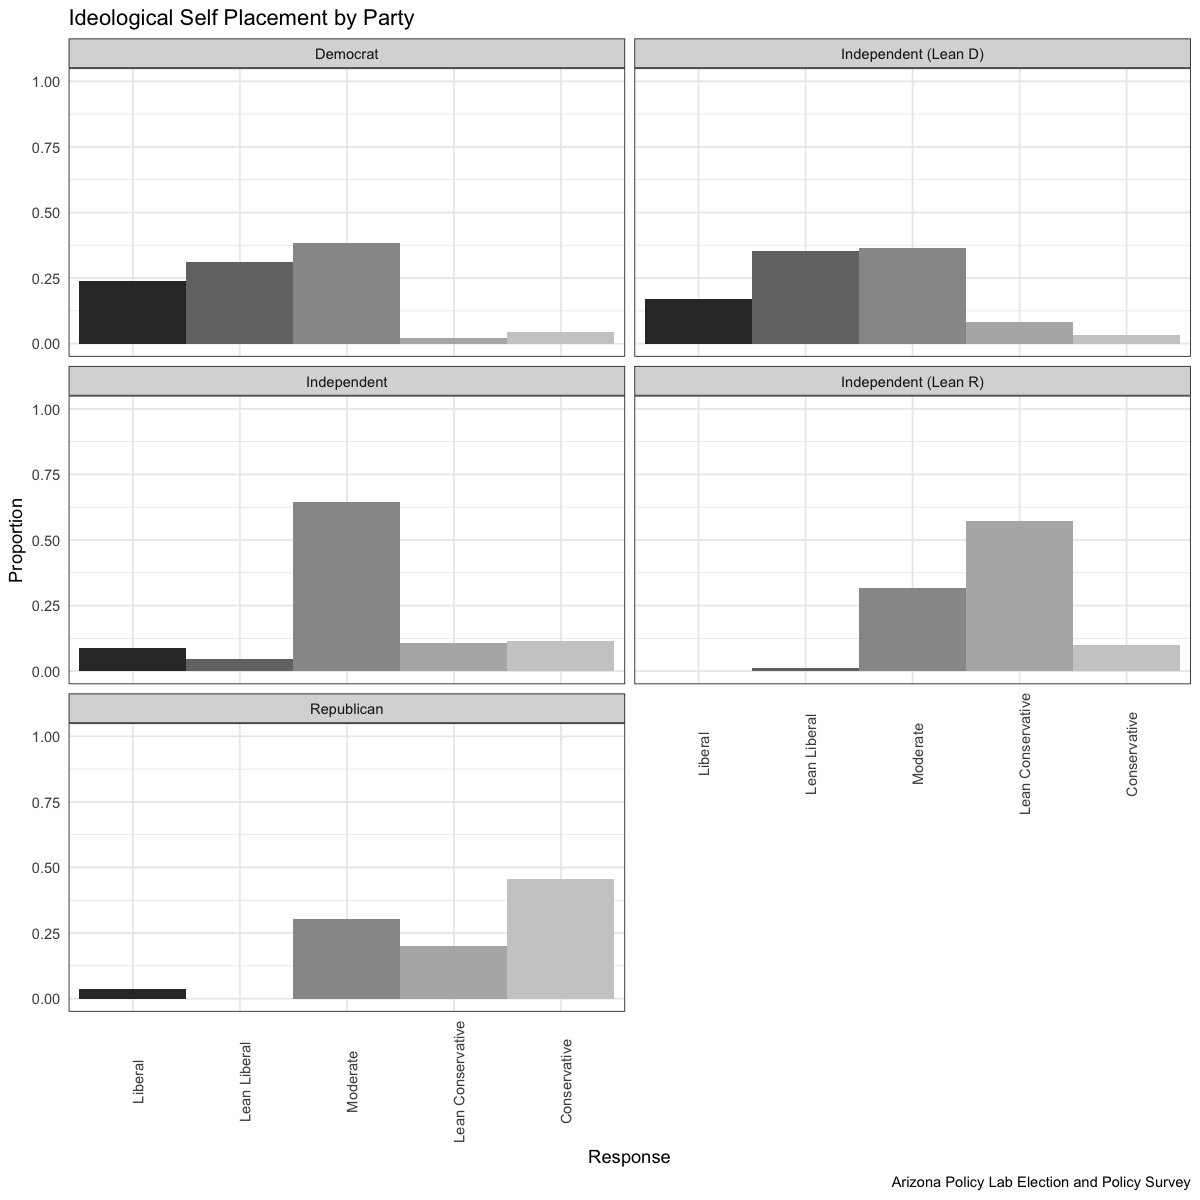

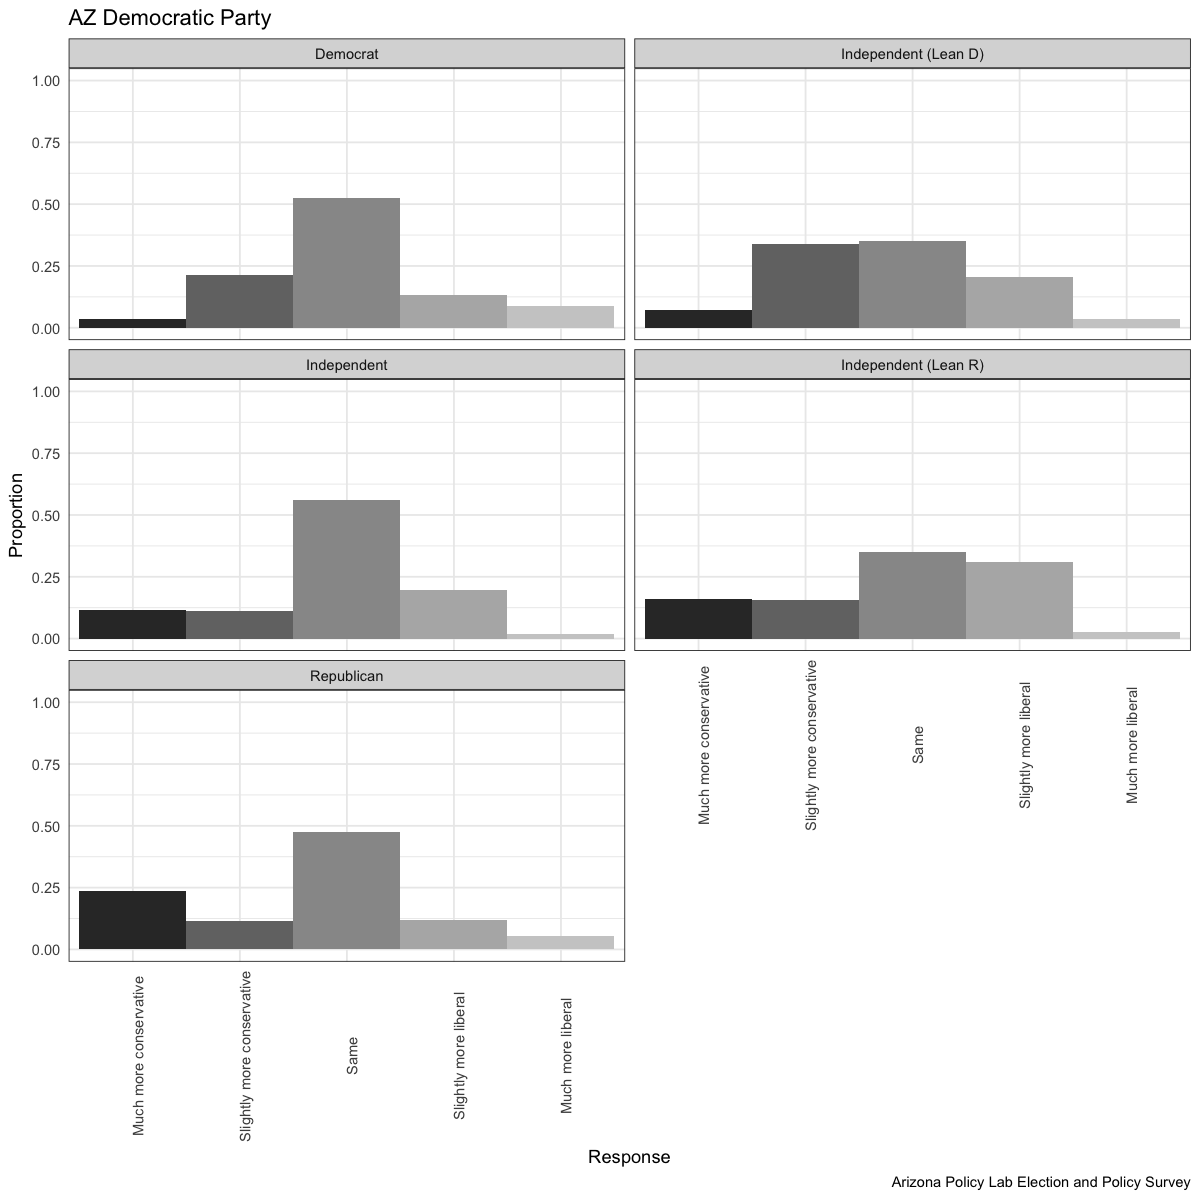

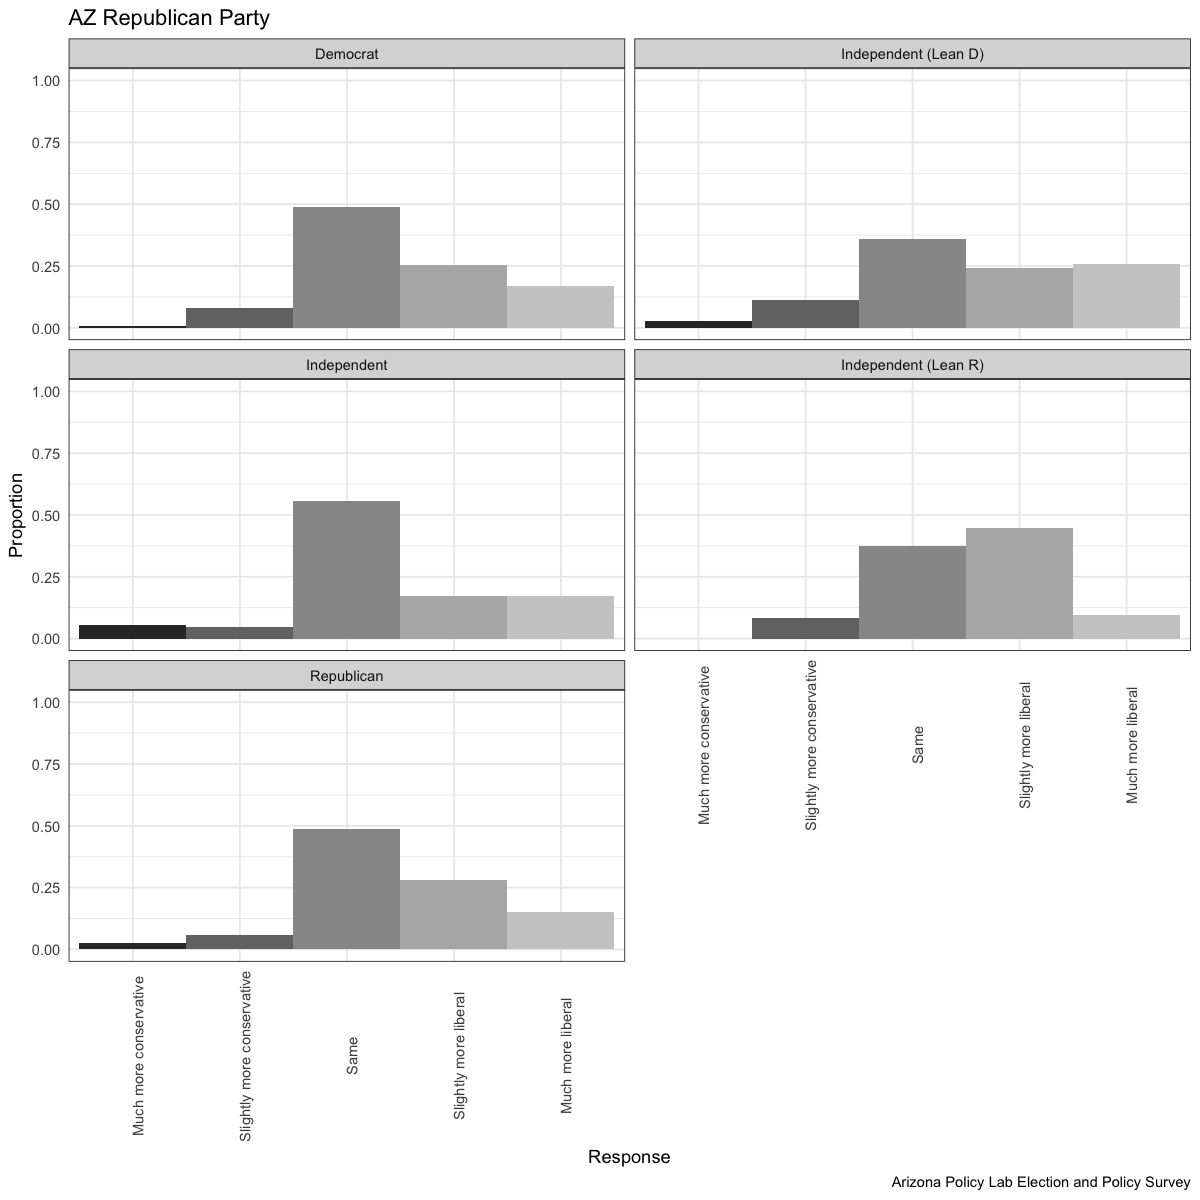

In [32]:
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)


options(repr.plot.width=10, repr.plot.height=10)

tab_w<-bi_plot("ideo", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
                                ))
plot.fun("Ideological Self Placement by Party",1)  ## Republicans are far more ideologically extreme

### Perceptions of the Parties 
tab_w<-bi_plot("dem_ideo", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun("AZ Democratic Party",1 , xlabels=c("Much more conservative", "Slightly more conservative", "Same", "Slightly more liberal", "Much more liberal")
)  ## Republicans are far more ideologically extreme

### Perceptions of the Parties 
tab_w<-bi_plot("rep_ideo", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun("AZ Republican Party",1 , xlabels=c("Much more conservative", "Slightly more conservative", "Same", "Slightly more liberal", "Much more liberal")
)  ## Republicans are far more ideologically extreme

Republican identifiers is somewhat more ideologically extreme than their Democratic counterpart, this is not projected on the opposing party. Respondents were asked the following question: Would you say that Republicans in Arizona are more conservative, more liberal, or about the same as the national Republican Party.” The modal category is “same” indicating that, but what’s noteworthy is the sizable number of Republicans who believe Arizona Democrats are more conservative than the national party.

The modal perception of the parties is that AZ Dems/Reps mirror the national party. Approximately half of Democrats and Republicans believe state Democrats are ideologically the same as the national Democratic Party. The results are largely the same for perceptions of the Republican Party. Approximately half of Democrats and Republicans believe that state Republicans are in lock-step with the national party.

What's particularly noteworthy, however, is that:

$\bullet$ Both Republicans and Democrats are more likely to say that Republican Arizonans are more liberal than the national party. This is important -- though on the whole Republicans are more ideologically "conservative," there is a perception that the national party is somewhat more conservative.


$\bullet$ The inverse is true for perceptions of Democrats. Republicans and Democrats are more likely to say that Democratic Arizonans are more conservative than the national party. 

***Taken together, this indicates that partisans in the state do not do not view the parties in the state as ideologically extreme; instead, the parties -- while ideologically different -- are perceived as less different than the parties at the national level***



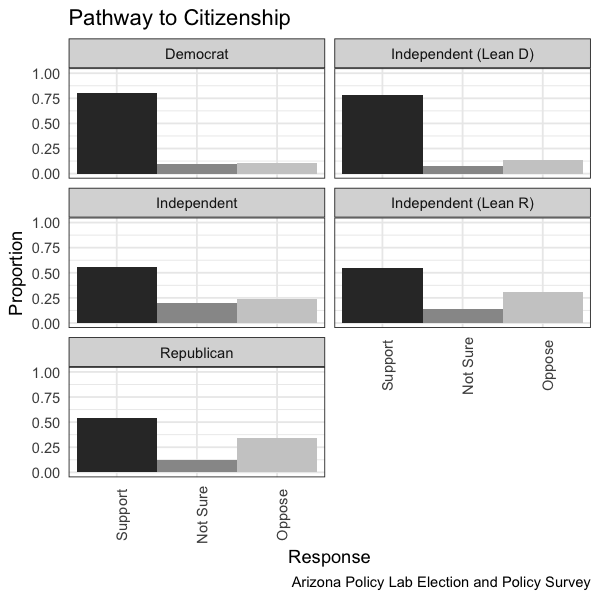

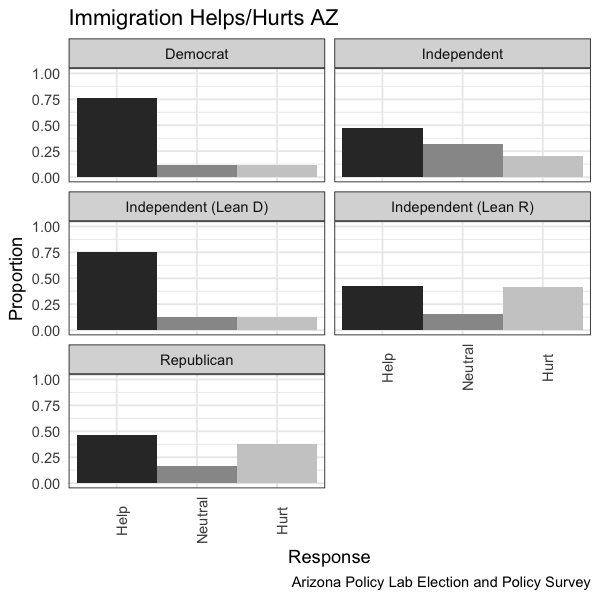

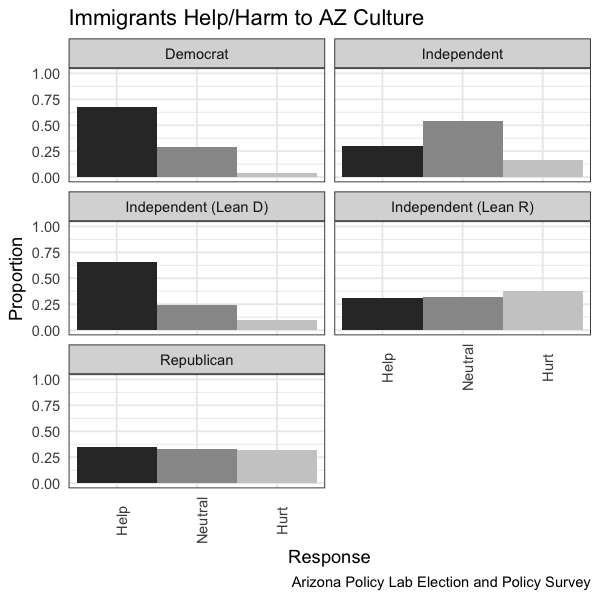

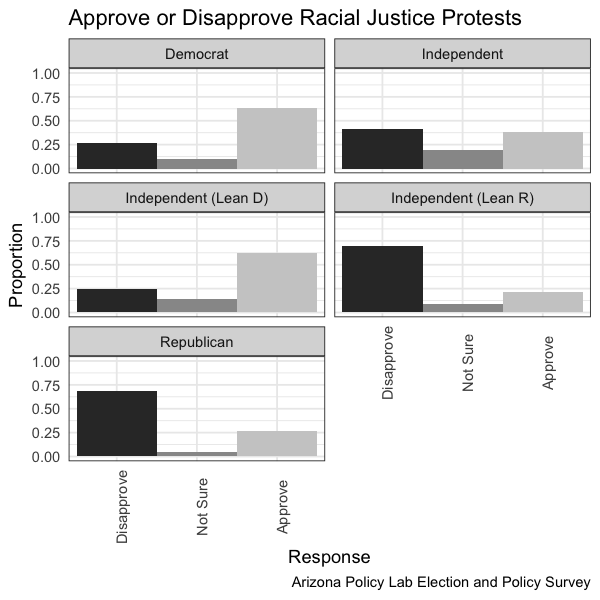

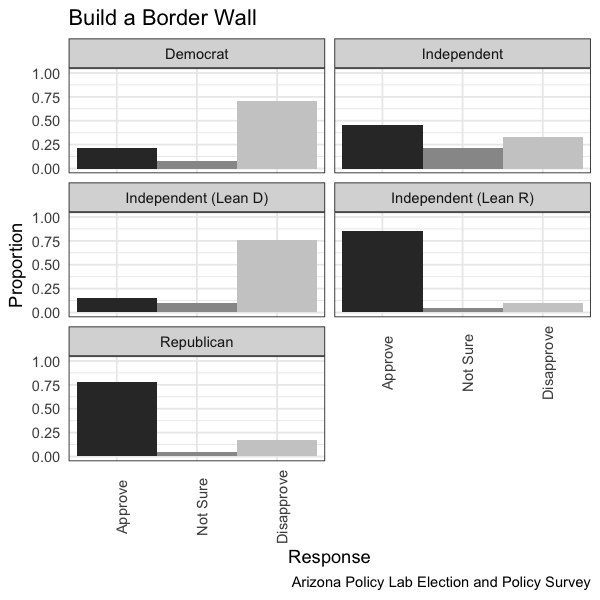

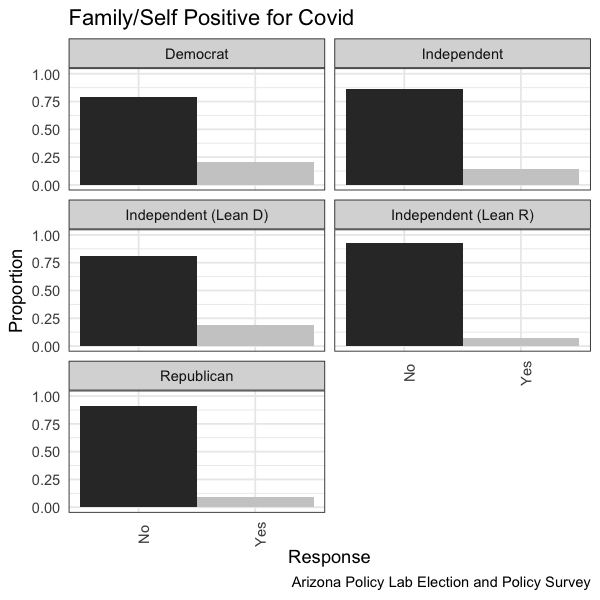

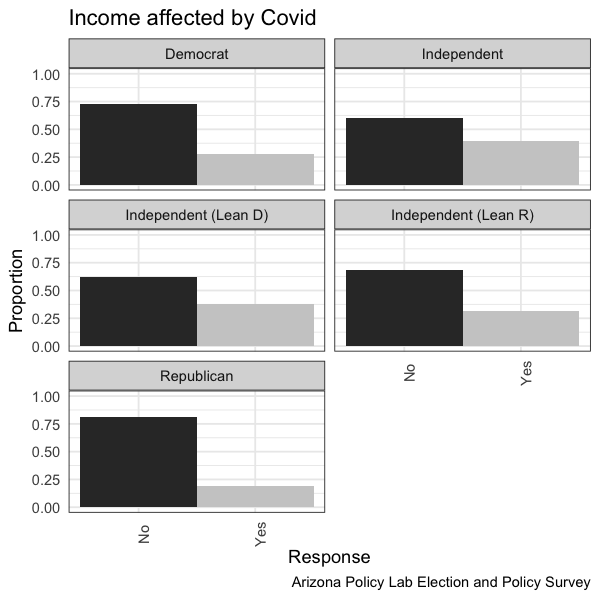

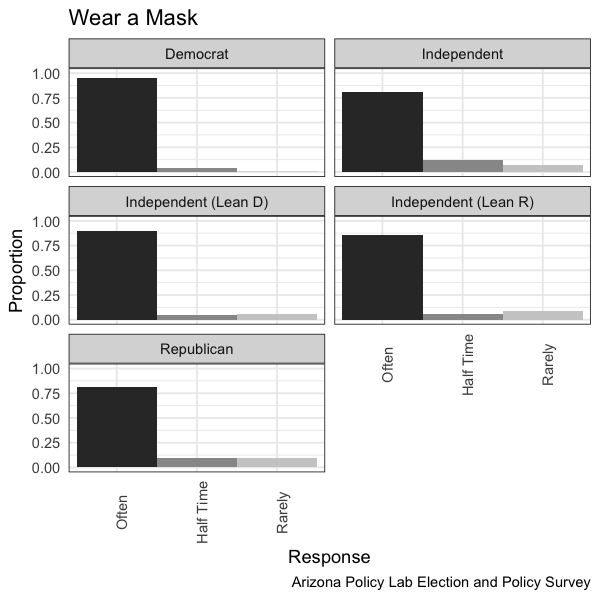

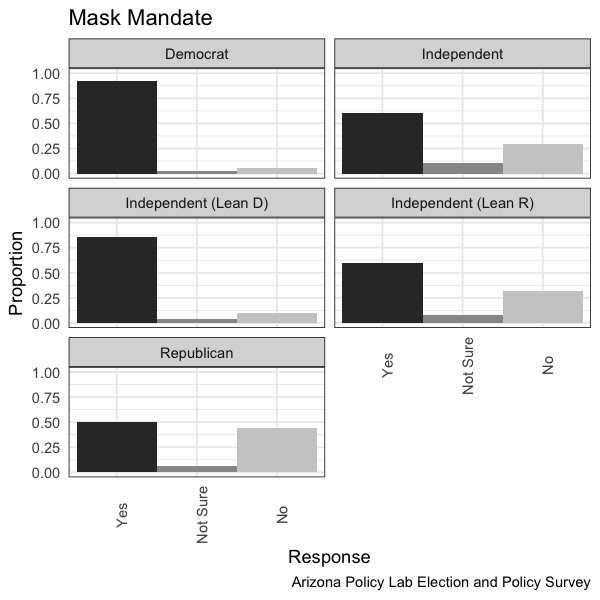

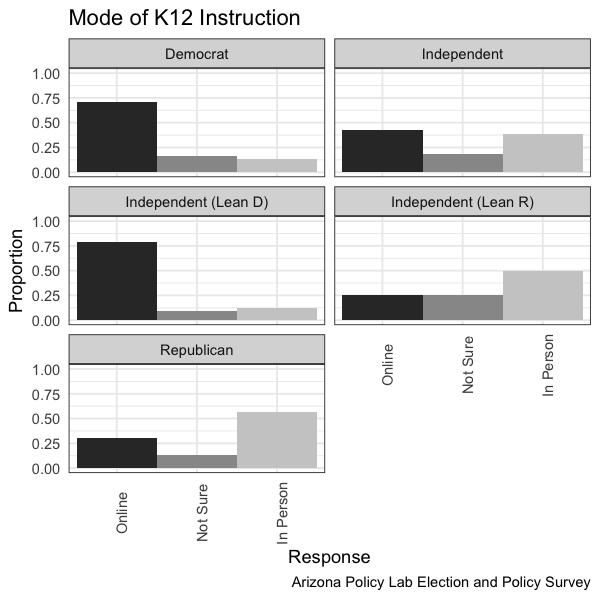

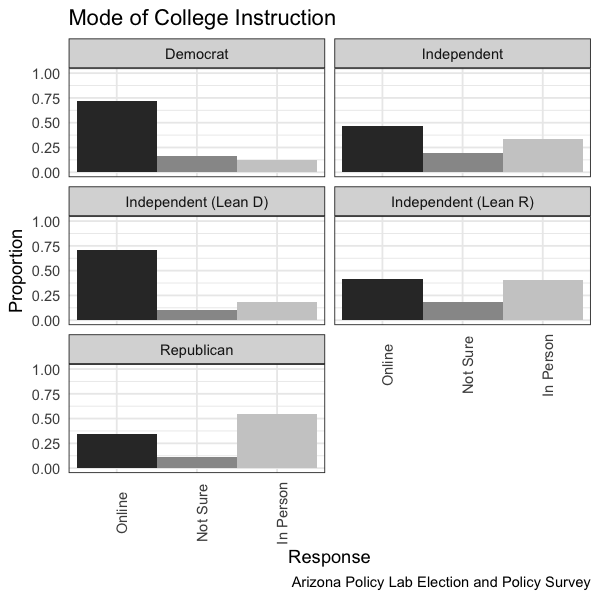

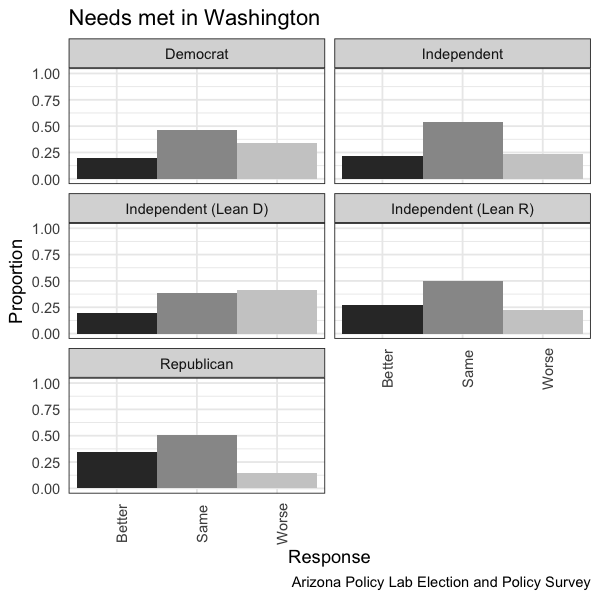

In [33]:
options(repr.plot.width=5, repr.plot.height=5)


plot.fun<-function(title, upper) { 
  plot <- ggplot(tab_w, aes(x = as.factor(y), y = Proportion, fill=as.factor(y))) + 
    facet_wrap(~group, ncol=2) + 
    geom_bar(width = 1, stat = "identity") + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle(title) +
    labs(caption="Arizona Policy Lab Election and Policy Survey")+
    scale_y_continuous("Proportion", limits = c(0, upper)) + 
    scale_x_discrete("Response")
  return(plot)
}




tab_w<-bi_plot("imm_citizenship_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Support", "Not Sure", "Oppose"))
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun("Pathway to Citizenship", 1)

tab_w<-bi_plot("imm_hurt_az_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigration Helps/Hurts AZ", 1)

tab_w<-bi_plot("imm_hurt_culture_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigrants Help/Harm to AZ Culture", 1)

tab_w<-bi_plot("oppose_race_protests_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Disapprove", "Not Sure", "Approve"))
plot.fun("Approve or Disapprove Racial Justice Protests", 1)

tab_w<-bi_plot("border_wall_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Approve", "Not Sure", "Disapprove"))
plot.fun("Build a Border Wall", 1)

tab_w<-bi_plot("covid_affected_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Yes"))
plot.fun("Family/Self Positive for Covid", 1)

tab_w<-bi_plot("covid_finance_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Yes"))
plot.fun("Income affected by Covid", 1)

tab_w<-bi_plot("wear_mask_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Often", "Half Time", "Rarely" ))
plot.fun("Wear a Mask", 1)

tab_w<-bi_plot("public_mask_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y,  c("Yes", "Not Sure", "No" ))
plot.fun("Mask Mandate", 1)

tab_w<-bi_plot("k12_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y, c("Online", "Not Sure", "In Person"))
plot.fun("Mode of K12 Instruction", 1)

tab_w<-bi_plot("college_r", "pid5", raked_data )
tab_w$y<-factor(tab_w$y,c("Online", "Not Sure", "In Person"))
plot.fun("Mode of College Instruction", 1)


tab_w<-bi_plot("needs_met_r", "pid5", raked_data )
plot.fun("Needs met in Washington", 1)




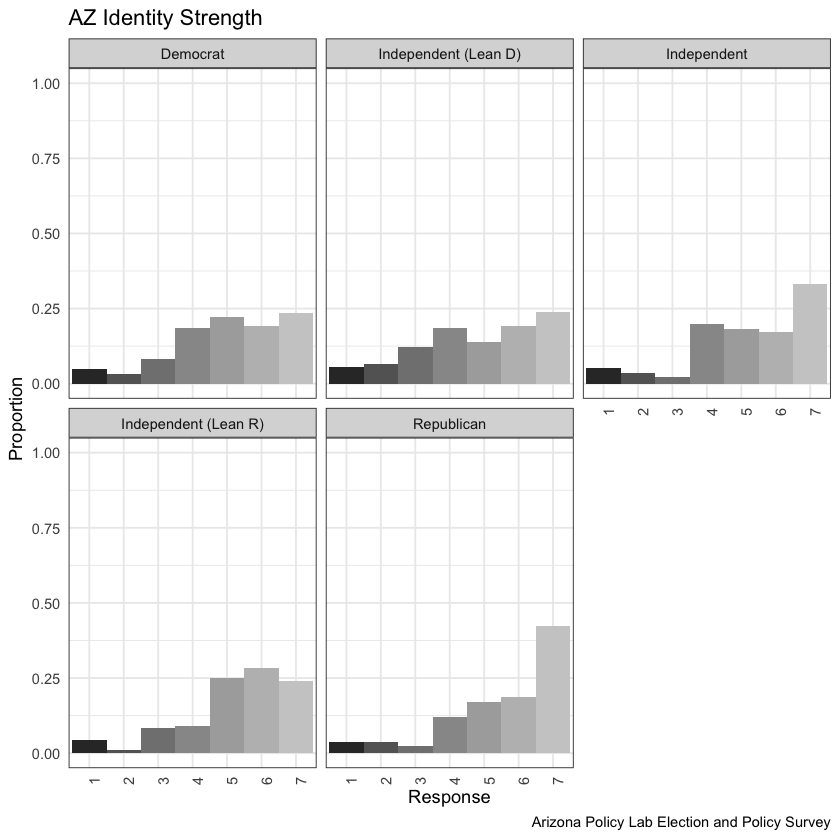

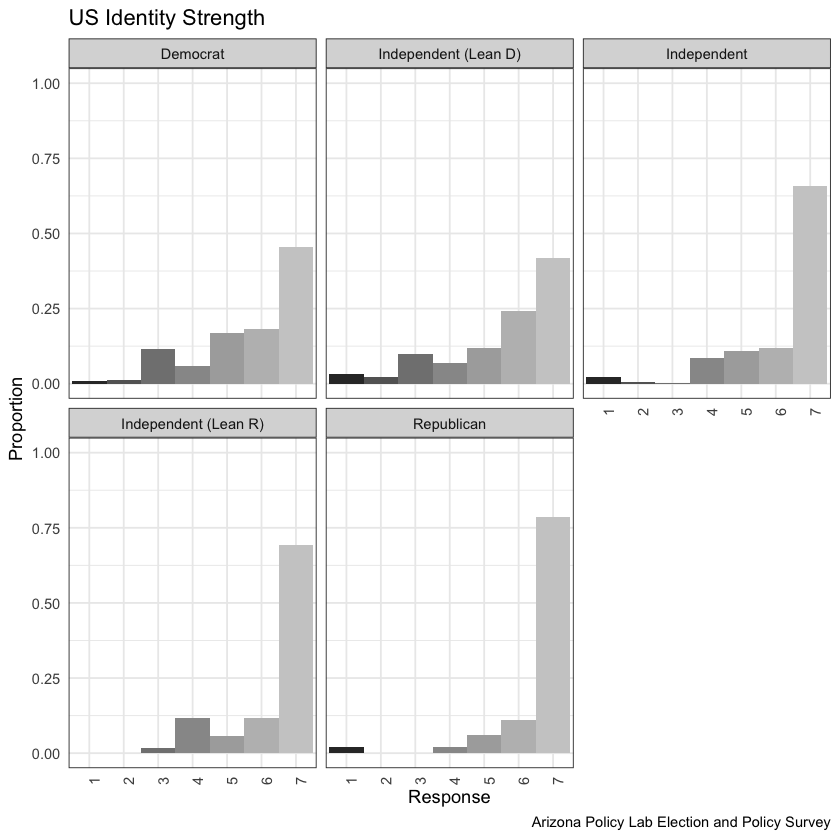

In [10]:
tab_w<-bi_plot("identity_AZ", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun<-function(title, upper) { 
  plot <- ggplot(tab_w, aes(x = as.factor(y), y = Proportion, fill=as.factor(y))) + 
    facet_wrap(~group, ncol=3) + 
    geom_bar(width = 1, stat = "identity") + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle(title) +
    labs(caption="Arizona Policy Lab Election and Policy Survey")+
    scale_y_continuous("Proportion", limits = c(0, upper)) + 
    scale_x_discrete("Response")
  return(plot)
}
plot.fun("AZ Identity Strength",1)
tab_w<-bi_plot("identity_US", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun("US Identity Strength",1)



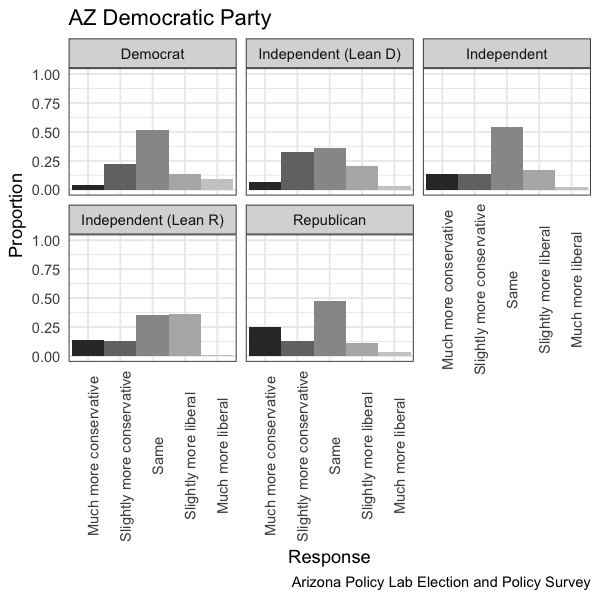

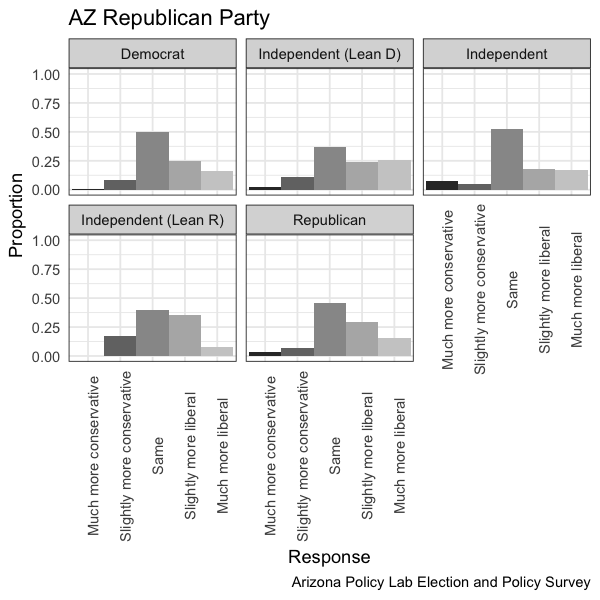

In [81]:
options(repr.plot.width=5, repr.plot.height=5)


plot.fun<-function(title, upper, xlabels=c("Liberal", "Lean Liberal", "Moderate", "Lean Conservative", "Conservative")) { 
  plot <- ggplot(tab_w, aes(x = as.factor(y), y = Proportion, fill=as.factor(y))) + 
    facet_wrap(~group, ncol=3) + 
    geom_bar(width = 1, stat = "identity") + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle(title) +
    labs(caption="Arizona Policy Lab Election and Policy Survey")+
    scale_y_continuous("Proportion", limits = c(0, upper)) + 
    scale_x_discrete("Response", labels=xlabels)
  return(plot)
}
### Perceptions of the Parties 
tab_w<-bi_plot("dem_ideo", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun("AZ Democratic Party",1 , xlabels=c("Much more conservative", "Slightly more conservative", "Same", "Slightly more liberal", "Much more liberal")
)  ## Republicans are far more ideologically extreme

### Perceptions of the Parties 
tab_w<-bi_plot("rep_ideo", "pid5", raked_data )
tab_w$group<-factor(tab_w$group, c("Democrat", "Independent (Lean D)", "Independent", "Independent (Lean R)", 
                                   "Republican"
))
plot.fun("AZ Republican Party",1 , xlabels=c("Much more conservative", "Slightly more conservative", "Same", "Slightly more liberal", "Much more liberal")
)  ## Republicans are far more ideologically extreme
